### Importing libraries 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Reading in Iris dataset

In [5]:
iris = pd.read_csv("C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Iris datset.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [317]:
#finding out number of rows and columns
iris.shape

(150, 5)

In [318]:
#finding out columns name
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

#### our dataset have 5 columns named sepal.length, sepal.width, petal.length, petal.width and variety 

In [319]:
#finding out datatype of each column
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### All the columns are numeric except one column named variety

In [321]:
#getting a quick summary of distribuition of data
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Checking for missing values


In [134]:
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

#### No missing values found

### Checking duplicates

In [135]:
data = iris.drop_duplicates(subset ="variety",)
data


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
100,6.3,3.3,6.0,2.5,Virginica


#### We have 3 unique varieties

### Checking if dataset is balanced

In [322]:
iris.value_counts("variety")

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

#### It is balanced all varities contain equal amount of rows

# Exploring features using histogram

#### Plotting histogram of Sepal Length

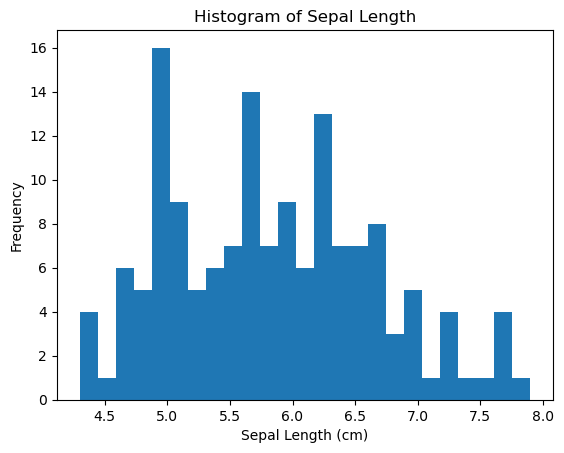

In [323]:
iris["sepal.length"].plot.hist(bins = 25)

plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")

plt.show()

#### Plotting histogram of Sepal width

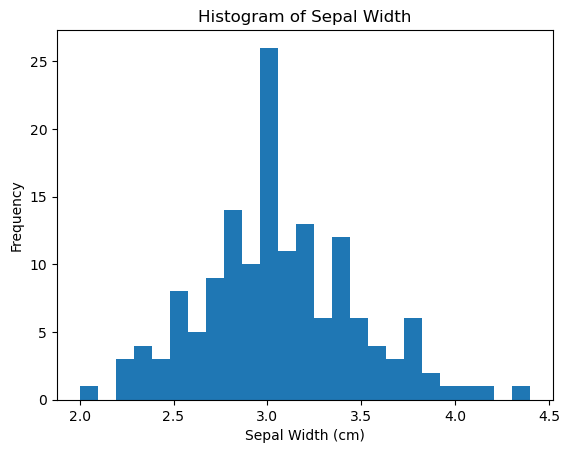

In [325]:
iris["sepal.width"].plot.hist(bins = 25)

plt.title("Histogram of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")

plt.show()

#### Plotting histogram of Petal Length

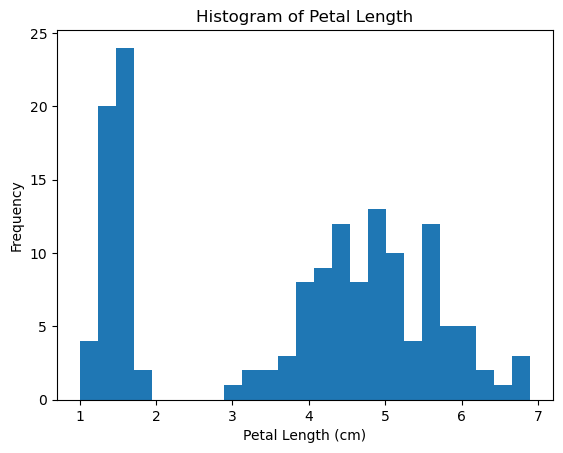

In [326]:
iris["petal.length"].plot.hist(bins = 25)

plt.title("Histogram of Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frequency")

plt.show()

#### Plotting histogram of Petal Width

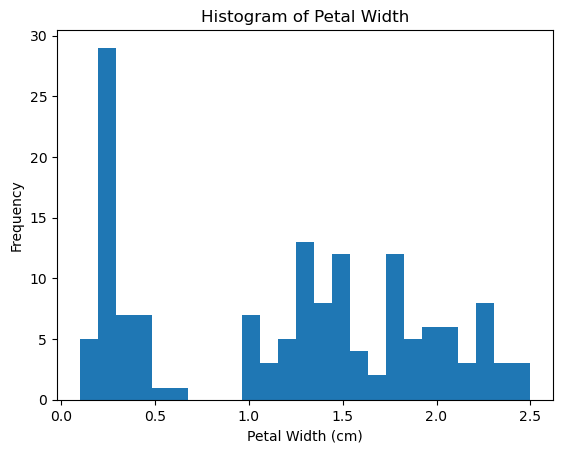

In [327]:
iris["petal.width"].plot.hist(bins = 25)

plt.title("Histogram of Petal Width")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frequency")

plt.show()

### Analysis from Histograms
#### From histograms we can see that values of Sepal length and Sepal width overlaps for all the variety of iris plant  but values of Petal length and Petal width can play a influencing role for diffrentiating the first variety of plant(Setosa) from other two varities of plant(Versicolor and virginica).

## Encoding target variable i.e converting it into numeric type ( Target variable = variety)

In [141]:
#importing label encoder 
from sklearn.preprocessing import LabelEncoder

In [142]:
# converting target variable into numeric type
le = LabelEncoder()
iris['variety'] = le.fit_transform(iris['variety'])
# printing first 5 observation to check the encoded value
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [143]:
#printing last 5 observations to check the encoded value
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [144]:
# checking the unique values for variety ( target variable)
iris.variety.unique()

array([0, 1, 2])

##### We can see that variety satosa became value -----> 1
#####                                       Versicolor became value ----->2
#####                                         Virginica became value ------> 3

## Writing out the encoded dataset

In [145]:
iris.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/encoded.csv', index=False)

## Splitting Data into train, validation and test set (60-20-20 ratio)

In [328]:
#importing train_test_split
from sklearn.model_selection import train_test_split

#reading encoded data
iris_en = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/encoded.csv')
iris_en.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [329]:
features = iris_en.drop('variety', axis=1)
labels = iris_en['variety']

#Splitting data into train validation and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [260]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


#### Here we can see that data is splitted into train, validation and test set with 60-20-20 ratio 

In [352]:
#writing out splitted data
X_train.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/train_features.csv', index=False)
X_val.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/val_features.csv', index=False)
X_test.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/test_features.csv', index=False)

y_train.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/train_labels.csv', index=False)
y_val.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/val_labels.csv', index=False)
y_test.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/test_labels.csv', index=False)


## Implementing algorithms (LR , SVM and RF)

In [330]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#reading training data
tr_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/train_features.csv')
tr_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/train_labels.csv')

In [331]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

## Implementing Logistic regression using K Fold Cross Validation and Grid Search

In [332]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] 
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 1}

0.622 (+/-0.333) for {'C': 0.001}
0.833 (+/-0.199) for {'C': 0.01}
0.911 (+/-0.166) for {'C': 0.1}
0.944 (+/-0.172) for {'C': 1}
0.944 (+/-0.122) for {'C': 10}
0.944 (+/-0.172) for {'C': 100}
0.944 (+/-0.172) for {'C': 1000}


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [333]:
#printing out best estimator
cv.best_estimator_

LogisticRegression(C=1)

In [334]:
#Pickling the best model using joblib
joblib.dump(cv.best_estimator_, 'C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel/LR_model.pkl')

['C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel/LR_model.pkl']

## Implementing SVM using K Fold Cross Validation and Grid Search

In [268]:
from sklearn.svm import SVC

In [337]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.922 (+/-0.113) for {'C': 0.1, 'kernel': 'linear'}
0.8 (+/-0.218) for {'C': 0.1, 'kernel': 'rbf'}
0.956 (+/-0.083) for {'C': 1, 'kernel': 'linear'}
0.922 (+/-0.113) for {'C': 1, 'kernel': 'rbf'}
0.933 (+/-0.109) for {'C': 10, 'kernel': 'linear'}
0.944 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [338]:
#printing out best estimator
cv.best_estimator_

SVC(C=1, kernel='linear')

In [339]:
#Pickling the best model using joblib
joblib.dump(cv.best_estimator_, 'C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel/SVM_model.pkl')

['C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel/SVM_model.pkl']

## Implementing Random Forest using K Fold Cross Validation and Grid Search

In [272]:
from sklearn.ensemble import RandomForestClassifier

In [340]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 2, 'n_estimators': 5}

0.933 (+/-0.163) for {'max_depth': 2, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 2, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 2, 'n_estimators': 250}
0.922 (+/-0.206) for {'max_depth': 4, 'n_estimators': 5}
0.933 (+/-0.215) for {'max_depth': 4, 'n_estimators': 50}
0.933 (+/-0.215) for {'max_depth': 4, 'n_estimators': 250}
0.9 (+/-0.178) for {'max_depth': 8, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 8, 'n_estimators': 50}
0.911 (+/-0.194) for {'max_depth': 8, 'n_estimators': 250}
0.911 (+/-0.194) for {'max_depth': 16, 'n_estimators': 5}
0.922 (+/-0.206) for {'max_depth': 16, 'n_estimators': 50}
0.922 (+/-0.206) for {'max_depth': 16, 'n_estimators': 250}
0.922 (+/-0.151) for {'max_depth': 32, 'n_estimators': 5}
0.911 (+/-0.194) for {'max_depth': 32, 'n_estimators': 50}
0.933 (+/-0.215) for {'max_depth': 32, 'n_estimators': 250}
0.933 (+/-0.215) for {'max_depth': None, 'n_estimators': 5}
0.922 (+/-0.206)

In [341]:
#printing out the best estimator
cv.best_estimator_


RandomForestClassifier(max_depth=2, n_estimators=5)

In [343]:
#Pickling the best model using joblib
joblib.dump(cv.best_estimator_, 'C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel/RF_model.pkl')

['C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel/RF_model.pkl']

## Using Precision, Recall, Accuracy and Latency to compare the performance of models

In [344]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time


In [345]:
models = {}

for mdl in ['LR','SVM','RF']:
    models[mdl] = joblib.load('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel/{}_model.pkl'.format(mdl))

In [346]:
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier(max_depth=2, n_estimators=5)}

In [347]:
#reading validation datasets
val_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/val_features.csv')
val_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/val_labels.csv')

In [348]:
#function to evaluate models
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average = 'weighted'), 3)
    recall = round(recall_score(labels, pred, average = 'weighted'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [349]:
#evaluating models on validation sets
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
RF -- Accuracy: 0.967 / Precision: 0.969 / Recall: 0.967 / Latency: 2.0ms


### ..........................Results explanation at bottom......................................

In [282]:
#reading test datasets
test_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/test_features.csv')
test_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata/test_labels.csv')

In [350]:
#Evaluating best performing model on test set
evaluate_model('Logistic Regression', models['LR'], test_features, test_labels)

Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms


## Splitting Data into train, validation and test set (80-10-10 ratio)

In [351]:
#importing train_test_split
from sklearn.model_selection import train_test_split

#reading encoded data
iris_en = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/encoded.csv')
iris_en.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [354]:
features = iris_en.drop('variety', axis=1)
labels = iris_en['variety']

#splitting data into train validation and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [355]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


#### Here we can see that data is splitted into train, validation and test set with 80-10-10 ratio

In [356]:
#writing out splitted data
X_train.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/train_features.csv', index=False)
X_val.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/val_features.csv', index=False)
X_test.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/test_features.csv', index=False)

y_train.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/train_labels.csv', index=False)
y_val.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/val_labels.csv', index=False)
y_test.to_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/test_labels.csv', index=False)

## Implementing algorithms (LR , SVM and RF)

In [357]:
#importing joblib
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

#reading training data
tr_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/train_features.csv')
tr_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/train_labels.csv')

In [358]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

## Implementing Logistic regression using K Fold Cross Validation and Grid Search

In [359]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 1}

0.817 (+/-0.201) for {'C': 0.001}
0.858 (+/-0.194) for {'C': 0.01}
0.933 (+/-0.113) for {'C': 0.1}
0.967 (+/-0.097) for {'C': 1}
0.942 (+/-0.113) for {'C': 10}
0.95 (+/-0.122) for {'C': 100}
0.95 (+/-0.122) for {'C': 1000}


C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Surya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [293]:
#printing out the best estimator
cv.best_estimator_

LogisticRegression(C=1)

In [360]:
#Pickling the best model using joblib
joblib.dump(cv.best_estimator_, 'C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel2/LR_model.pkl')

['C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel2/LR_model.pkl']

## Implementing Random Forest using K Fold Cross Validation and Grid Search

In [361]:
from sklearn.ensemble import RandomForestClassifier

In [362]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 16, 'n_estimators': 50}

0.95 (+/-0.122) for {'max_depth': 2, 'n_estimators': 5}
0.942 (+/-0.155) for {'max_depth': 2, 'n_estimators': 50}
0.925 (+/-0.143) for {'max_depth': 2, 'n_estimators': 250}
0.917 (+/-0.129) for {'max_depth': 4, 'n_estimators': 5}
0.942 (+/-0.113) for {'max_depth': 4, 'n_estimators': 50}
0.95 (+/-0.122) for {'max_depth': 4, 'n_estimators': 250}
0.942 (+/-0.113) for {'max_depth': 8, 'n_estimators': 5}
0.95 (+/-0.122) for {'max_depth': 8, 'n_estimators': 50}
0.95 (+/-0.082) for {'max_depth': 8, 'n_estimators': 250}
0.942 (+/-0.113) for {'max_depth': 16, 'n_estimators': 5}
0.958 (+/-0.091) for {'max_depth': 16, 'n_estimators': 50}
0.958 (+/-0.091) for {'max_depth': 16, 'n_estimators': 250}
0.942 (+/-0.113) for {'max_depth': 32, 'n_estimators': 5}
0.95 (+/-0.122) for {'max_depth': 32, 'n_estimators': 50}
0.942 (+/-0.113) for {'max_depth': 32, 'n_estimators': 250}
0.95 (+/-0.122) for {'max_depth': None, 'n_estimators': 5}
0.95 (+/-0.122) fo

In [363]:
#printing out best estimator
cv.best_estimator_

RandomForestClassifier(max_depth=16, n_estimators=50)

In [364]:
#Pickling the best model using joblib
joblib.dump(cv.best_estimator_, 'C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel2/RF_model.pkl')

['C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel2/RF_model.pkl']

## Implementing SVM using K Fold Cross Validation and Grid Search

In [365]:
from sklearn.svm import SVC

In [366]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.942 (+/-0.125) for {'C': 0.1, 'kernel': 'linear'}
0.892 (+/-0.155) for {'C': 0.1, 'kernel': 'rbf'}
0.958 (+/-0.091) for {'C': 1, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 1, 'kernel': 'rbf'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'linear'}
0.95 (+/-0.122) for {'C': 10, 'kernel': 'rbf'}


In [367]:
#printing out the best estimator
cv.best_estimator_

SVC(C=1, kernel='linear')

In [368]:
#pickling the best model using joblib
joblib.dump(cv.best_estimator_, 'C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel2/SVM_model.pkl')

['C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel2/SVM_model.pkl']

## Using Precision, Recall, Accuracy and Latency to compare the performance of models

In [304]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

In [370]:
models = {}

for mdl in ['LR','SVM','RF']:
    models[mdl] = joblib.load('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Pickledmodel2/{}_model.pkl'.format(mdl))

In [371]:
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=1, kernel='linear'),
 'RF': RandomForestClassifier(max_depth=16, n_estimators=50)}

In [307]:
#reading validation dataset
val_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/val_features.csv')
val_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/val_labels.csv')

#function to evalaute model
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average = 'weighted'), 3)
    recall = round(recall_score(labels, pred, average = 'weighted'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [373]:
#evaluating models
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms


### ..........................Results explanation at bottom......................................

In [376]:
#reading test datasets
test_features = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/test_features.csv')
test_labels = pd.read_csv('C:/Users/Surya/Desktop/SURYA GEORGIAN/AIDI 1003 Machine learning frameworks/IRIS DATASET PROJECT 1/Traindata2/test_labels.csv')

In [377]:
#evaluating best performing model on test set
evaluate_model('Logistic Regression', models['LR'], test_features, test_labels)

Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms


# Explanation of results:

## Best models with 60-20-20 ratio splits
LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms

SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms

RF -- Accuracy: 0.967 / Precision: 0.969 / Recall: 0.967 / Latency: 2.0ms

## Best models with 80-10-10 ratio splits
LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms

SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms

RF -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms

We can see that in 60-20-20 data split, Logistic Regression and SVM gives similar results for Accuracy, Precision, Recall and Latency.

They both are giving value of Accuracy, Precision,and Recall as 1.0 which shows that our models are overfitting on data i.e, models are memorizing the training datasets instead of learning the underlying patterns.

This overfitting indicates that these are models are too complex for small size and quality of dataset.

Moreover, Logistic regression and SVM tends to overfit if relationship between target variable and feature variables is not truly linear but We cant say surely if that is the case here.

Overfitting can be tackled by regularization techniques or by using simple models with fewer parameters.

I tried to regularize the model by adding penalty term (l2 in case of LR) to loss function and by changing the value of 'c' paramter in function but there was no significant change in the results. 

In 60-20-20 split we can see that Random Forest is generating some other values of Accuracy, precision and recall which shows RF is might be able to capture the underlying trend in data without overfitting.

Moreover with 80-10-10 splits we can see that all the models even RF are generationg 1.0 as the value for Accuracy, Precison, and recall which again suggest that models are overfitting on data due to their complexity and small size of dataset.

By comparing all the models from both the splits right now we can say that LR is performing best as it is giving best value of Accuracy, Precison, recall and latency compared to others. However it is mostprobably overfitting as the value is 1.0 

To determine the best model we have to avoid overfitting, which can be acheived by obtaing more training data so that we can better capture the relationship in data.

